# Nifty 50 週足 メディアン統計

In [30]:
import sys
path_up = '..'
if not path_up in sys.path:
    sys.path.append(path_up)

In [31]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf

from funcs.technical import calc_robust_bollinger

code = 'NSEI'
symbol = '^%s' % code
#symbol = 'USDJPY=X'
ticker = yf.Ticker(symbol)
df = ticker.history(period='3y', interval='1wk')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-03-14 00:00:00+05:30,16633.699219,17344.599609,16555.000000,17287.050781,1404600,0.0,0.0
2022-03-21 00:00:00+05:30,17329.500000,17442.400391,17006.300781,17153.000000,1443300,0.0,0.0
2022-03-28 00:00:00+05:30,17181.849609,17703.699219,17003.900391,17670.449219,1566200,0.0,0.0
2022-04-04 00:00:00+05:30,17809.099609,18114.650391,17600.550781,17784.349609,1541000,0.0,0.0
2022-04-11 00:00:00+05:30,17740.900391,17779.050781,17442.349609,17475.650391,762800,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-10 00:00:00+05:30,23543.800781,23568.599609,22774.849609,22929.250000,1302100,0.0,0.0
2025-02-17 00:00:00+05:30,22809.900391,23049.949219,22720.300781,22795.900391,1108600,0.0,0.0
2025-02-24 00:00:00+05:30,22609.349609,22668.050781,22104.849609,22124.699219,1305100,0.0,0.0


In [32]:
df0 = ticker.history(period='5y', interval='1wk')
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-03-09 00:00:00+05:30,9107.599609,10159.400391,8555.150391,9955.200195,1388000,0.0,0.0
2020-03-16 00:00:00+05:30,9587.799805,9602.200195,7832.549805,8745.450195,5347100,0.0,0.0
2020-03-23 00:00:00+05:30,7945.700195,9038.900391,7511.100098,8660.250000,3795900,0.0,0.0
2020-03-30 00:00:00+05:30,8385.950195,8678.299805,8055.799805,8083.799805,2509300,0.0,0.0
2020-04-06 00:00:00+05:30,8446.299805,9131.700195,8360.950195,9111.900391,2452800,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-10 00:00:00+05:30,23543.800781,23568.599609,22774.849609,22929.250000,1302100,0.0,0.0
2025-02-17 00:00:00+05:30,22809.900391,23049.949219,22720.300781,22795.900391,1108600,0.0,0.0
2025-02-24 00:00:00+05:30,22609.349609,22668.050781,22104.849609,22124.699219,1305100,0.0,0.0


## Moving Median

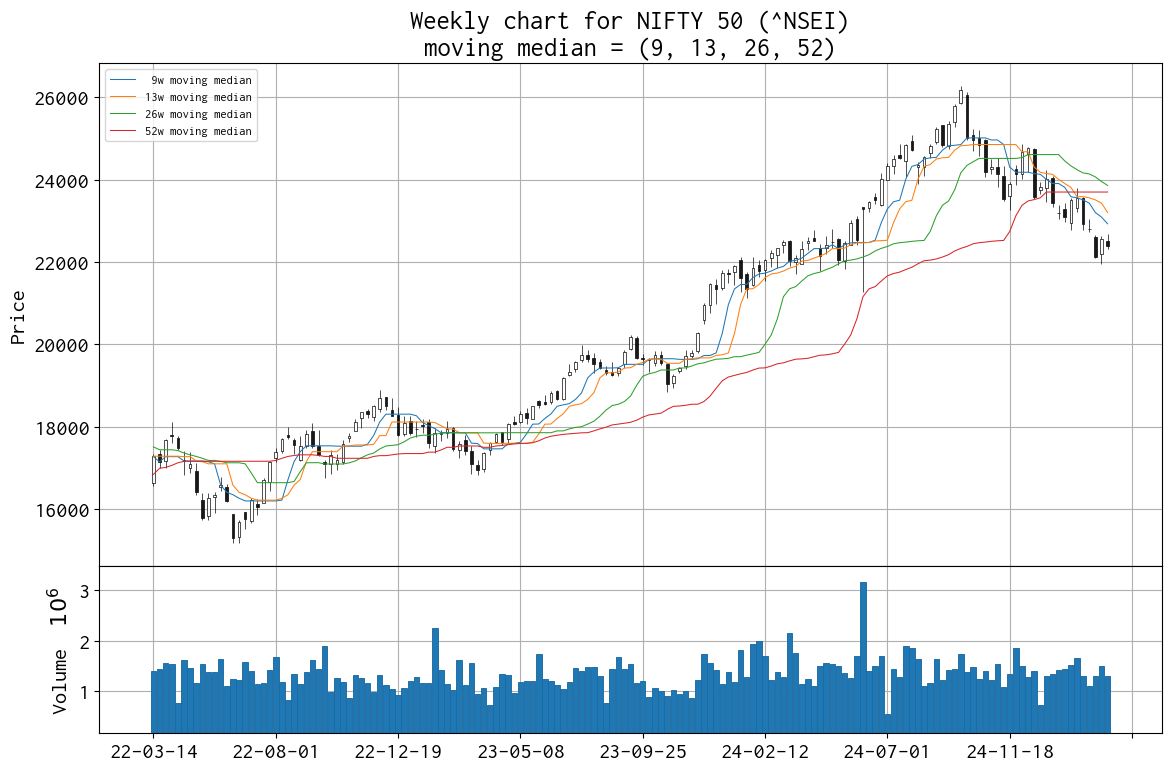

In [33]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig = plt.figure(figsize=(12, 8))
ax = dict()
n = 2
gs = fig.add_gridspec(
    n, 1,
    wspace=0.0, hspace=0.0,
    height_ratios=[3 if i == 0 else 1 for i in range(n)]
)
for i, axis in enumerate(gs.subplots(sharex='col')):
    ax[i] = axis
    ax[i].grid()

mm09 = df0['Close'].rolling(9).median()
mm13 = df0['Close'].rolling(13).median()
mm26 = df0['Close'].rolling(26).median()
mm52 = df0['Close'].rolling(52).median()

apds  = [
    mpf.make_addplot(mm09[df.index], width=0.75, label=' 9w moving median', ax=ax[0]),
    mpf.make_addplot(mm13[df.index], width=0.75, label='13w moving median', ax=ax[0]),
    mpf.make_addplot(mm26[df.index], width=0.75, label='26w moving median', ax=ax[0]),
    mpf.make_addplot(mm52[df.index], width=0.75, label='52w moving median', ax=ax[0]),
]   

mpf.plot(
    df, type='candle', style='default',
    volume=ax[1],
    datetime_format='%y-%m-%d',
    addplot=apds,
    xrotation=0,
    ax=ax[0],
)
ax[0].set_title('Weekly chart for %s (%s)\nmoving median = (9, 13, 26, 52)' %(ticker.info['longName'], symbol))
ax[0].legend(loc='upper left', fontsize=9)

plt.tight_layout()
plt.savefig('report_weekly_chart_median_%s.png' % code)
plt.show()

In [34]:
df.tail(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-03-03 00:00:00+05:30,22194.550781,22633.800781,21964.599609,22552.500000,1503500,0.0,0.0
2025-03-10 00:00:00+05:30,22521.849609,22676.750000,22314.699219,22397.199219,1299000,0.0,0.0


In [35]:
df.tail(2)['Close']

Date
2025-03-03 00:00:00+05:30    22552.500000
2025-03-10 00:00:00+05:30    22397.199219
Name: Close, dtype: float64

In [36]:
df.tail(2)['Close'].diff()

Date
2025-03-03 00:00:00+05:30           NaN
2025-03-10 00:00:00+05:30   -155.300781
Name: Close, dtype: float64

In [37]:
df['Close'].tail(1) - df['Open'].tail(1)

Date
2025-03-10 00:00:00+05:30   -124.650391
dtype: float64

In [38]:
df['Close'].rolling(9).median().tail()

Date
2025-02-10 00:00:00+05:30    23508.400391
2025-02-17 00:00:00+05:30    23431.500000
2025-02-24 00:00:00+05:30    23203.199219
2025-03-03 00:00:00+05:30    23092.199219
2025-03-10 00:00:00+05:30    22929.250000
Name: Close, dtype: float64

In [39]:
df['Close'].rolling(13).median().tail()

Date
2025-02-10 00:00:00+05:30    23587.500000
2025-02-17 00:00:00+05:30    23559.949219
2025-02-24 00:00:00+05:30    23508.400391
2025-03-03 00:00:00+05:30    23431.500000
2025-03-10 00:00:00+05:30    23203.199219
Name: Close, dtype: float64

In [40]:
df['Close'].rolling(26).median().tail()

Date
2025-02-10 00:00:00+05:30    24164.500000
2025-02-17 00:00:00+05:30    24139.649414
2025-02-24 00:00:00+05:30    24067.924805
2025-03-03 00:00:00+05:30    23956.000000
2025-03-10 00:00:00+05:30    23860.325195
Name: Close, dtype: float64

In [41]:
df['Close'].rolling(52).median().tail()

Date
2025-02-10 00:00:00+05:30    23700.450195
2025-02-17 00:00:00+05:30    23700.450195
2025-02-24 00:00:00+05:30    23700.450195
2025-03-03 00:00:00+05:30    23700.450195
2025-03-10 00:00:00+05:30    23700.450195
Name: Close, dtype: float64

## Robust Bollinger's bands

In [42]:
period = 26
calc_robust_bollinger(df0, period)
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Median,Q1,Q3,Lower,Upper
Date,,,,,,,,,,,,
2020-03-09 00:00:00+05:30,9107.599609,10159.400391,8555.150391,9955.200195,1388000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2020-03-16 00:00:00+05:30,9587.799805,9602.200195,7832.549805,8745.450195,5347100,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2020-03-23 00:00:00+05:30,7945.700195,9038.900391,7511.100098,8660.250000,3795900,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2020-03-30 00:00:00+05:30,8385.950195,8678.299805,8055.799805,8083.799805,2509300,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2020-04-06 00:00:00+05:30,8446.299805,9131.700195,8360.950195,9111.900391,2452800,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-10 00:00:00+05:30,23543.800781,23568.599609,22774.849609,22929.250000,1302100,0.0,0.0,24242.575195,23643.975098,24853.575684,21829.574219,26667.976562
2025-02-17 00:00:00+05:30,22809.900391,23049.949219,22720.300781,22795.900391,1108600,0.0,0.0,24164.500000,23566.836914,24853.575684,21636.728760,26783.683838
2025-02-24 00:00:00+05:30,22609.349609,22668.050781,22104.849609,22124.699219,1305100,0.0,0.0,24139.649414,23539.511719,24853.575684,21568.415771,26824.671631


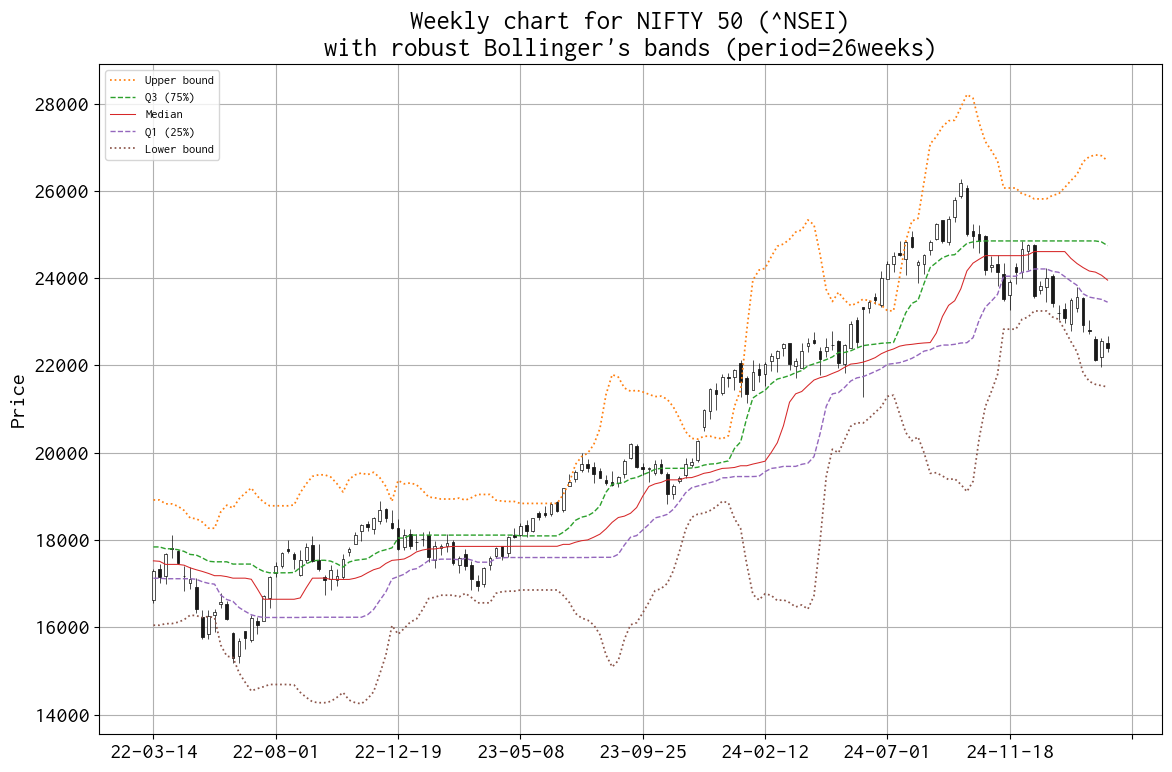

In [43]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots(figsize=(12, 8))

# Bollinger bands
mv_median = df0['Median']
mv_q1 = df0['Q1']
mv_q3 = df0['Q3']
mv_lower = df0['Lower']
mv_upper = df0['Upper']

apds  = [
    mpf.make_addplot(mv_upper[df.index], width=1.25, color='C1', linestyle='dotted', label='Upper bound', ax=ax),
    mpf.make_addplot(mv_q3[df.index], width=1, color='C2', linestyle='dashed', label='Q3 (75%)', ax=ax),
    mpf.make_addplot(mv_median[df.index], width=0.75, color='C3', label='Median', ax=ax),
    mpf.make_addplot(mv_q1[df.index], width=1, color='C4', linestyle='dashed', label='Q1 (25%)', ax=ax),
    mpf.make_addplot(mv_lower[df.index], width=1.25, color='C5', linestyle='dotted', label='Lower bound', ax=ax),
]   

mpf.plot(
    df, type='candle', style='default',
    addplot=apds,
    datetime_format='%y-%m-%d',
    xrotation=0,
    ax=ax,
)

ax.grid()
ax.legend(loc='best', fontsize=9)

try:
    ax.set_title('Weekly chart for %s (%s)\nwith robust Bollinger\'s bands (period=%dweeks)' % (ticker.info['longName'], symbol, period))
except KeyError:
    ax.set_title('Weekly chart for %s\nwith robust Bollinger\'s bands (period=%sweeks)' % (symbol, period))

plt.tight_layout()
plt.savefig('report_weekly_chart_bollinger_robust_%s.png' % code)
plt.show()

## ヒストグラム

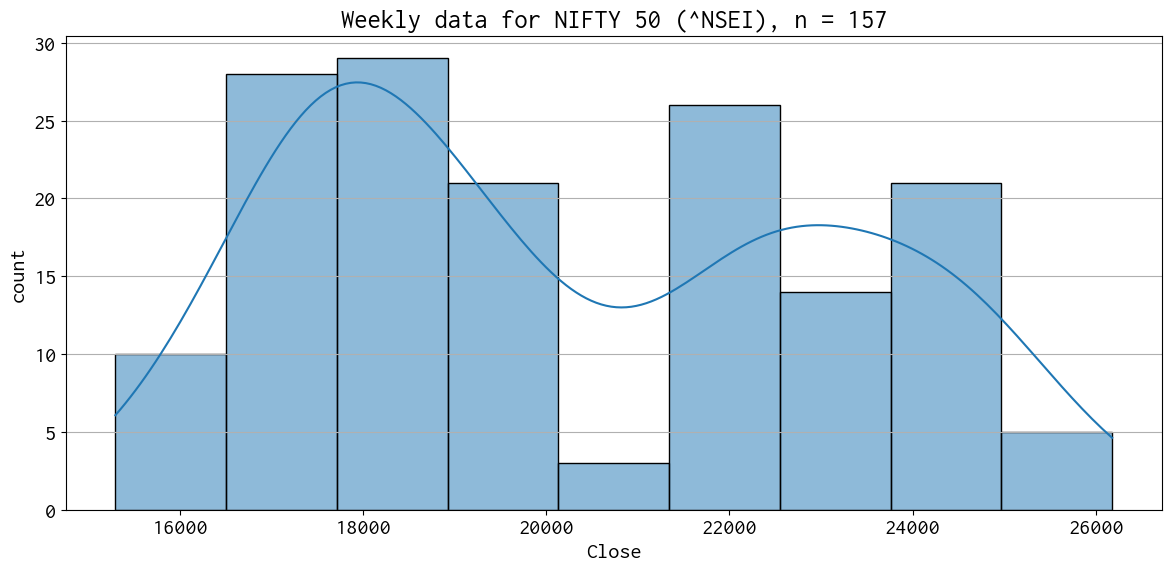

In [44]:
plt.rcParams['font.size'] = 16
fig = plt.figure(figsize=(12, 6))
#ax = fig.add_axes(111)
ax = fig.add_subplot(111)

sns.histplot(
    df['Close'],
    kde=True,
    ax=ax
)

ax.set_xlabel("Close")
ax.set_ylabel("count")
ax.set_title('Weekly data for %s (%s), n = %d' % (ticker.info['longName'], symbol, len(df)))
ax.grid(axis = 'y')

plt.tight_layout()
plt.savefig('report_weekly_histogram_%s.png' % code)
plt.show()